# **Import libraries**

In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.metrics import silhouette_score
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import re   ## for regular expressions
from mpl_toolkits.mplot3d import Axes3D

# **Load Dataset**

In [13]:
# reading text file into csv and loading into dataframe
df_raw = pd.read_csv('/content/Sampleof_predictivemaintenance.csv')
df_raw.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,L48083,L,295.7,306.2,2270,14.6,149,1,Power Failure
1,2,M15740,M,295.8,306.3,1235,76.2,89,1,Power Failure
2,3,M15778,M,295.3,305.7,1473,38.5,189,0,No Failure
3,4,M15774,M,295.4,305.9,1518,40.6,178,0,No Failure
4,5,M15876,M,296.3,307.2,1319,68.3,24,1,Power Failure


# **Data Pre-Processing**

In [14]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      29 non-null     int64  
 1   Product ID               29 non-null     object 
 2   Type                     29 non-null     object 
 3   Air temperature [K]      29 non-null     float64
 4   Process temperature [K]  29 non-null     float64
 5   Rotational speed [rpm]   29 non-null     int64  
 6   Torque [Nm]              29 non-null     float64
 7   Tool wear [min]          29 non-null     int64  
 8   Target                   29 non-null     int64  
 9   Failure Type             29 non-null     object 
dtypes: float64(3), int64(4), object(3)
memory usage: 2.4+ KB


In [15]:
df_raw["Target"] = df_raw['Target'].astype(object)
df_raw['Tool wear [min]'] = df_raw['Tool wear [min]'].astype('float64')
df_raw['Rotational speed [rpm]'] = df_raw['Rotational speed [rpm]'].astype('float64')
df_raw.rename(mapper={'Air temperature [K]': 'Air temperature',
                    'Process temperature [K]': 'Process temperature',
                    'Rotational speed [rpm]': 'Rotational speed',
                    'Torque [Nm]': 'Torque',
                    'Tool wear [min]': 'Tool wear'}, axis=1, inplace=True)
df_raw['Product ID'] = df_raw['Product ID'].apply(lambda x: x[1:])
df_raw['Product ID'] = pd.to_numeric(df_raw['Product ID'])

In [16]:
df_raw.head()

,UDI,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,1,48083,L,295.7,306.2,2270.0,14.6,149.0,1,Power Failure
1,2,15740,M,295.8,306.3,1235.0,76.2,89.0,1,Power Failure
2,3,15778,M,295.3,305.7,1473.0,38.5,189.0,0,No Failure
3,4,15774,M,295.4,305.9,1518.0,40.6,178.0,0,No Failure
4,5,15876,M,296.3,307.2,1319.0,68.3,24.0,1,Power Failure


In [17]:
df_raw.info()
df_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  29 non-null     int64  
 1   Product ID           29 non-null     int64  
 2   Type                 29 non-null     object 
 3   Air temperature      29 non-null     float64
 4   Process temperature  29 non-null     float64
 5   Rotational speed     29 non-null     float64
 6   Torque               29 non-null     float64
 7   Tool wear            29 non-null     float64
 8   Target               29 non-null     object 
 9   Failure Type         29 non-null     object 
dtypes: float64(5), int64(2), object(3)
memory usage: 2.4+ KB


,UDI,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,1,48083,L,295.7,306.2,2270.0,14.6,149.0,1,Power Failure
1,2,15740,M,295.8,306.3,1235.0,76.2,89.0,1,Power Failure
2,3,15778,M,295.3,305.7,1473.0,38.5,189.0,0,No Failure
3,4,15774,M,295.4,305.9,1518.0,40.6,178.0,0,No Failure
4,5,15876,M,296.3,307.2,1319.0,68.3,24.0,1,Power Failure


# **Dropping Labels**

In [21]:
Label_id_intermediate=df_raw[["Target","Failure Type"]]
# Label_id=Label_id_intermediate["Target"]
Label_id=Label_id_intermediate["Failure Type"]
# Label_id = Label_id.iloc[:25]
print(Label_id)

0                Power Failure
1                Power Failure
2                   No Failure
3                   No Failure
4                Power Failure
5                Power Failure
6                   No Failure
7                   No Failure
8                   No Failure
9                   No Failure
10               Power Failure
11          Overstrain Failure
12          Overstrain Failure
13          Overstrain Failure
14                  No Failure
15                  No Failure
16                  No Failure
17                  No Failure
18                  No Failure
19                  No Failure
20                  No Failure
21    Heat Dissipation Failure
22    Heat Dissipation Failure
23               Power Failure
24    Heat Dissipation Failure
25               Power Failure
26    Heat Dissipation Failure
27    Heat Dissipation Failure
28    Heat Dissipation Failure
Name: Failure Type, dtype: object


In [20]:
Label_id.head()

0    Power Failure
1    Power Failure
2       No Failure
3       No Failure
4    Power Failure
Name: Failure Type, dtype: object

In [8]:
# num_zeros = (Label_id_intermediate['Target']  == 0).sum()
# num_ones = (Label_id_intermediate['Target']  == 1).sum()

In [9]:
# rows_zeros = Label_id_intermediate[Label_id_intermediate['Target'] == 0].sample(n=num_zeros // 2)
# rows_ones = Label_id_intermediate[Label_id_intermediate['Target'] == 1].sample(n=num_ones // 2)
# print(len(rows_zeros))
# result = pd.concat([rows_zeros, rows_ones]).sample(frac=1).reset_index(drop=True)
# result = result.iloc[:50]
# print(result)

In [10]:
df_raw=df_raw.drop(["Target","Failure Type","UDI","Product ID","Type"], axis=1) 
print(df_raw.head())

   Air temperature  Process temperature  Rotational speed  Torque  Tool wear
0            295.7                306.2            2270.0    14.6      149.0
1            295.8                306.3            1235.0    76.2       89.0
2            295.3                305.7            1473.0    38.5      189.0
3            295.4                305.9            1518.0    40.6      178.0
4            296.3                307.2            1319.0    68.3       24.0


In [11]:
df_raw_3d=df_raw.drop(["Process temperature","Tool wear","Air temperature"], axis=1) 
# df_raw_3d = df_raw_3d.iloc[:25]
# print(df_raw_3d.head())
df_raw_3d.head()

,Rotational speed,Torque
0,2270.0,14.6
1,1235.0,76.2
2,1473.0,38.5
3,1518.0,40.6
4,1319.0,68.3


# **K-Means Clustering for K=2**

In [ ]:
kmeans_object = sklearn.cluster.KMeans(n_clusters=2)
kmeans_pm2=kmeans_object.fit(df_raw_3d)
# Get cluster assignment labels
labels_pm =kmeans_pm2.labels_
prediction_kmeans_km = kmeans_object.predict(df_raw_3d)

In [ ]:
# print("Prediction 3D\n")
# print(type(prediction_kmeans_km))
# print(prediction_kmeans_km)
# print("Actual\n")
# print(type(Label_id))
# print(Label_id)

## **Converting Numeric Labels to Text**

In [ ]:
# print(type(Label_id))
# label_mapping = {0: 'Failure', 1: 'No Failure'}
# TrueLabel_num = Label_id.map(label_mapping)
# print(TrueLabel_num)
# print(type(Label_id))
label_mapping = {'No Failure' : 0, 'Heat Dissipation Failure': 1, 'Overstrain Failure':1 , 'Power Failure': 1}
TrueLabel_num = Label_id.map(label_mapping)
print(TrueLabel_num)


0     1
1     1
2     0
3     0
4     1
5     1
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
Name: Failure Type, dtype: int64


In [ ]:
# fig2 = plt.figure(figsize=(8, 8))
# ax2 = Axes3D(fig2, rect=[0, 0, .90, 1], elev=48, azim=134)
# # print(df_raw_3d)
# x=df_raw_3d.iloc[:,0] 
# y=df_raw_3d.iloc[:,1] 
# # z=df_raw_3d.iloc[:,2] 
# # print(x,y,z)

# # ax2.scatter(x,y,z, cmap="RdYlGn", edgecolor='k', s=200,c=prediction_kmeans_km)
# ax2.scatter(x,y, cmap="gnuplot", edgecolor='k', s=350,c=prediction_kmeans_km, alpha=0.65)
# ax2.w_xaxis.set_ticklabels([])
# ax2.w_yaxis.set_ticklabels([])
# ax2.w_zaxis.set_ticklabels([])

# ax2.set_xlabel('Air temperature', fontsize=10)
# ax2.set_ylabel('Process temperature', fontsize=10)
# ax2.set_zlabel('Rotational Speed', fontsize=10)
# plt.show()
# plt.savefig("kmeans2.png")

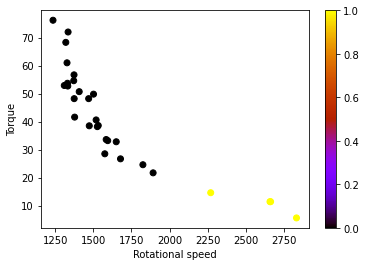

In [ ]:
# perform K-Means clustering with k=2
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_raw_3d)

# plot the results
plt.scatter(df_raw_3d.iloc[:,0], df_raw_3d.iloc[:,1], c=pred_y, cmap='gnuplot')
plt.xlabel('Rotational speed', fontsize=10)
plt.ylabel('Torque', fontsize=10)
plt.xticks(fontsize=10,)
plt.yticks(fontsize=10,)
plt.colorbar()
plt.show()

The x-label describes the rotational speed and y-label is the torque. 

In [ ]:
# import plotly.express as px

# fig = px.scatter_3d(df_raw_3d, x=df_raw_3d.columns[0], y=df_raw_3d.columns[1], z=df_raw_3d.columns[2],
#                     color=prediction_kmeans_km, color_continuous_scale='RdYlGn', opacity=0.7,
#                     size_max=10)
# fig.update_layout(scene=dict(xaxis_title='Air temperature', yaxis_title='Process temperature', zaxis_title='Rotational Speed'),
#                   font=dict(size=15))
# fig.show()


In [ ]:
# centers3D = kmeans_pm2.cluster_centers_
# print(centers3D)
# print(centers3D[0,0])
# xs=(centers3D[0,0], centers3D[1,0])
# ys=(centers3D[0,1], centers3D[1,1])
# ax2.scatter(xs,ys, c='black', s=2000, alpha=0.2)
# plt.show()

# **K means clustering for K=3**

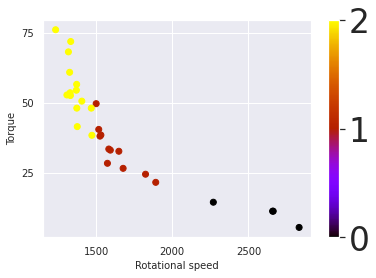

In [ ]:
# perform K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_raw_3d)

plt.scatter(df_raw_3d.iloc[:,0], df_raw_3d.iloc[:,1], c=pred_y, cmap='gnuplot')
plt.xlabel('Rotational speed', fontsize=10)
plt.ylabel('Torque', fontsize=10)
plt.xticks(fontsize=10,)
plt.yticks(fontsize=10,)
plt.colorbar()
plt.show()

# **K means clustering for K=4**

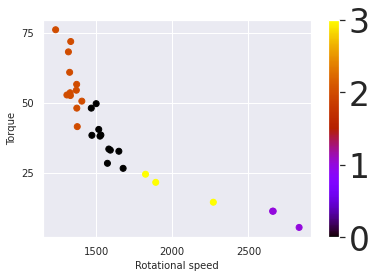

In [ ]:
# perform K-Means clustering with k=4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_raw_3d)

plt.scatter(df_raw_3d.iloc[:,0], df_raw_3d.iloc[:,1], c=pred_y, cmap='gnuplot')
plt.xlabel('Rotational speed', fontsize=10)
plt.xticks(fontsize=10,)
plt.ylabel('Torque', fontsize=10)
plt.yticks(fontsize=10,)
plt.colorbar()
plt.show()

# **Silhouette Method**

The Silhouette method is a technique used to evaluate the quality of clustering results. It provides a measure of how well each data point fits into its assigned cluster, and a measure of how separated the clusters are from each other. The Silhouette score ranges from -1 to 1, where a higher score indicates better clustering.

To compute the Silhouette score for each data point, the method compares the average distance between the data point and all other points within the same cluster (a measure of cohesion) to the average distance between the data point and all other points in the nearest cluster (a measure of separation). If the data point is well-clustered, it should have a high degree of cohesion within its cluster and a low degree of separation from other clusters, resulting in a Silhouette score close to 1. If a data point has a Silhouette score close to -1, it means that it has been poorly clustered and should be considered for reassignment to another cluster.



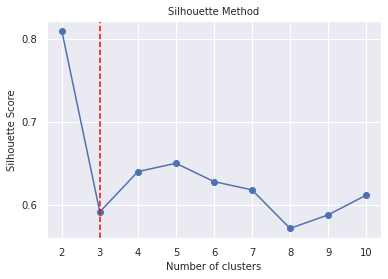

In [ ]:
# Define the range of clusters to test
range_n_clusters = list(range(2, 11))

# Compute the silhouette scores for each value of k
silhouette_scores = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(df_raw_3d)
    silhouette_avg = silhouette_score(df_raw_3d, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for each value of k
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Method',fontsize=10)
plt.xlabel('Number of clusters',fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.xticks(range_n_clusters,fontsize=10)
plt.yticks(fontsize=10,)

plt.axvline(x=3, linestyle='--', color='red')
plt.show()

# **Elbow Method**

We need to confirm how many clusters are ideal. The elbow approach can be used to determine the ideal number of clusters. To do this, we compute the sum of squared distances (SSE) over a range of k values between each point and its closest cluster center (number of clusters). Next, for each value of k, we plot the SSE, and we choose the value of k that is at the "elbow" of the plot, where the rate of decline in SSE slows down.

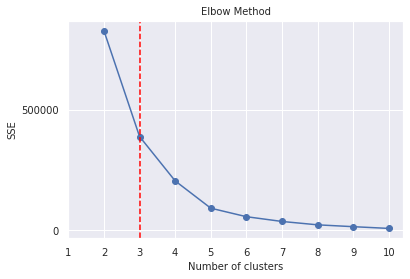

In [ ]:
# Elbow method
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_raw_3d)
    sse.append(kmeans.inertia_)

# plot the SSE for each value of k
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method',fontsize=10)
plt.xlabel('Number of clusters',fontsize=10)
plt.ylabel('SSE',fontsize=10)
plt.axvline(x=3, linestyle='--', color='red')
plt.xticks(range(1, 11),fontsize=10)
plt.yticks(fontsize=10)

plt.show()


From the above plot we can see that optimal value od clusters is 3.

# **Looking at distances**


In [ ]:
df_raw_3d.head()
X=df_raw_3d

from sklearn.metrics.pairwise import euclidean_distances
## Distance between each pair of rows (vectors)
Euc_dist=euclidean_distances(X, X)

from sklearn.metrics.pairwise import manhattan_distances
Man_dist=manhattan_distances(X,X)

from sklearn.metrics.pairwise import cosine_distances
Cos_dist=cosine_distances(X,X)

from sklearn.metrics.pairwise import cosine_similarity
Cos_Sim=cosine_similarity(X,X)

#The cosine distance is equivalent to the half the squared 
## euclidean distance if each sample is normalized to unit norm


# **Visualize distances**


[[   0.         1036.83150029  797.35826954  752.44933384  952.51492902
   563.07193146  744.37420697  863.75471634  620.26707151  686.26306909
   937.75836973  769.80519614  897.98742196  944.14085814  592.12364418
   676.25583916  378.06667401  695.1389861   738.39014078  445.11234537
   801.70440937  961.76290737  899.88943765  389.01316173  938.77346043
   393.01302777  940.81284536  896.62977867  893.40808145]
 [1036.83150029    0.          240.96740443  285.23036304   84.37067026
  1599.55880167  293.47061182  173.87998735  417.26317834  351.59032979
    99.08905086  267.30686486  139.37090801   93.24719835  445.7569405
   361.56603823  659.25658889  343.32971034  299.37060644  592.25210848
   235.66925977   77.58150553  137.7046114  1425.47361954   99.80606194
  1429.469496     97.62812095  141.79210133  146.15457571]
 [ 797.35826954  240.96740443    0.           45.04897335  156.85674993
  1360.39788665   53.00084905   67.11810486  177.09175588  111.10810051
   142.97989369   3

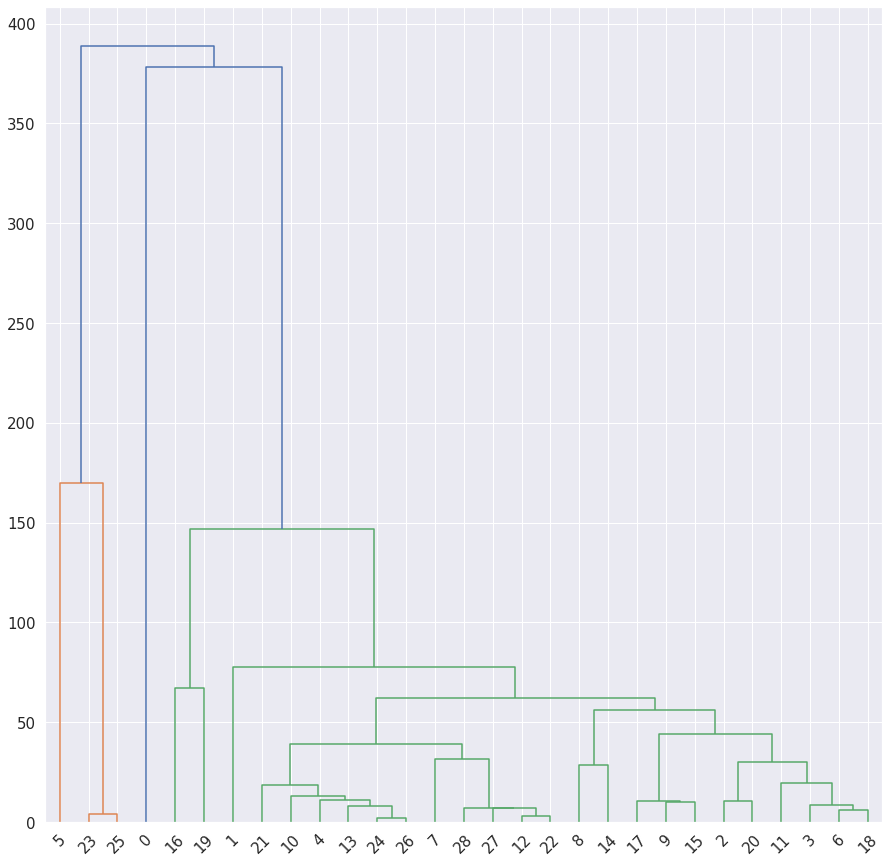

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(Euc_dist)
X=df_raw_3d
#sns.set()  #back to defaults
sns.set(font_scale=3)
Z = linkage(squareform(np.around(euclidean_distances(X), 3)))

fig4 = plt.figure(figsize=(15, 15))
ax4 = fig4.add_subplot(111)
dendrogram(Z, ax=ax4)
ax4.tick_params(axis='x', which='major', labelsize=15)
ax4.tick_params(axis='y', which='major', labelsize=15)
#ax5 = fig4.add_subplot(212)
# fig4.savefig('exampleSave.png')

(array([0., 1.]), [Text(1, 0.0, '0'), Text(1, 1.0, '1')])

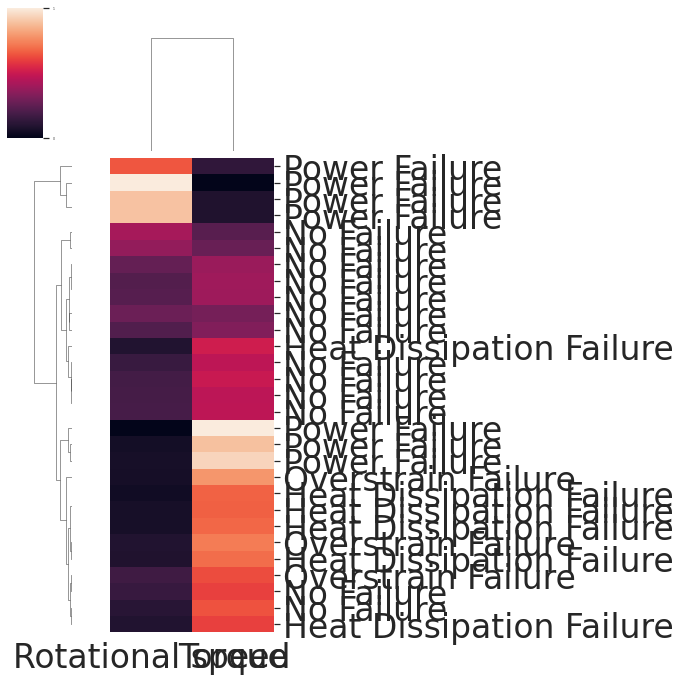

In [ ]:

from sklearn import preprocessing

x = X.values #returns a numpy array
# print(x)
#Instantiate the min-max scaler
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
DF3D_scaled = pd.DataFrame(x_scaled)
# print(df_raw_3d.columns)
# fig = plt.subplots(figsize=(10, 10))
sns.clustermap(DF3D_scaled,yticklabels=Label_id, 
               xticklabels=df_raw_3d.columns)
plt.xticks(fontsize=3,)
plt.yticks(fontsize=3,)


([<matplotlib.axis.YTick at 0x7fd368c1f640>,
 [Text(0, 0.5, '0'),
  Text(0, 2.5, '2'),
  Text(0, 4.5, '4'),
  Text(0, 6.5, '6'),
  Text(0, 8.5, '8'),
  Text(0, 10.5, '10'),
  Text(0, 12.5, '12'),
  Text(0, 14.5, '14'),
  Text(0, 16.5, '16'),
  Text(0, 18.5, '18'),
  Text(0, 20.5, '20'),
  Text(0, 22.5, '22'),
  Text(0, 24.5, '24'),
  Text(0, 26.5, '26'),
  Text(0, 28.5, '28'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

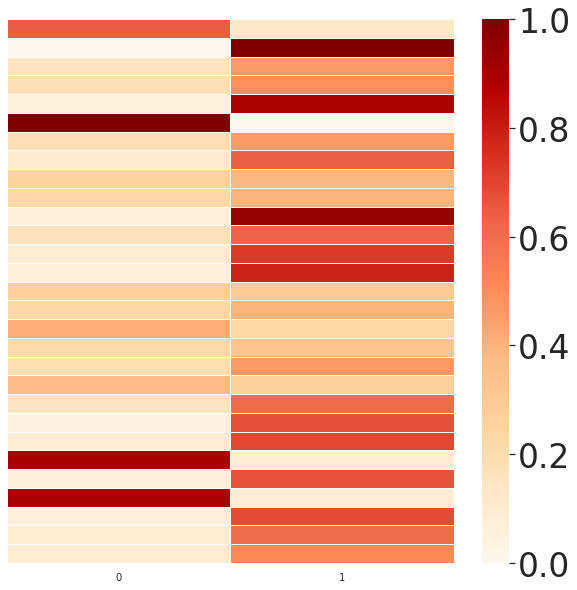

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(
    DF3D_scaled,
    cmap='OrRd',
    linewidth=1
)
xticklabels=df_raw_3d.columns
plt.xticks(fontsize=10,)
plt.yticks(TrueLabel_num,fontsize=15)
